---
title: Getting org units from DHIS2 Web API
short_title: Getting from Web API
---

This page shows practical ways to fetch organisation unit geojson from the DHIS2 Web API using `dhis2-python-client` library.

In the **climate-tools** environment, `dhis2-python-client` library is already installed. You only need to come up with your DHIS2 credentials and server address to use this library. Below is a basic usage:

In [11]:
import geopandas as gpd
import io
import json

from dhis2_client import DHIS2Client
from dhis2_client.settings import ClientSettings

# Client configuration
cfg = ClientSettings(
  base_url="http://localhost:8080",
  username="admin",
  password="district")

client = DHIS2Client(settings=cfg)
info = client.get_system_info()

# Check if everything is working.
# You should see your current DHIS2 version info.
print("▶ Current DHIS2 version:", info["version"])

▶ Current DHIS2 version: 2.42.2-SNAPSHOT


Once you are sure to be able to make connection with your DHIS2 instance, you can proceed to fetching geojson info. But first you need to decide which orgunit(s) or level you want to fetch. Below is an example for fetching geojson info for all orgunits from `level=2

In [18]:

geojson = client.get("/api/organisationUnits.geojson", params={"level": 2})

# Convert dict -> string -> file-like object
geojson_str = json.dumps(geojson)
geojson_io = io.StringIO(geojson_str)

# Read directly into a GeoDataFrame
gdf = gpd.read_file(geojson_io)

# Show a compact summary
gdf[["name", "level", "geometry"]].head()

Skipping field groups: unsupported OGR type: 5


,name,level,geometry
0,Bo,2,"POLYGON ((-11.5914 8.4875, -11.5906 8.4769, -1..."
1,Bombali,2,"POLYGON ((-11.8091 9.2032, -11.8102 9.1944, -1..."
2,Bonthe,2,"MULTIPOLYGON (((-12.5568 7.3832, -12.5574 7.38..."
3,Kailahun,2,"POLYGON ((-10.7972 7.5866, -10.8002 7.5878, -1..."
4,Kambia,2,"MULTIPOLYGON (((-13.1349 8.8471, -13.1343 8.84..."


<Axes: >

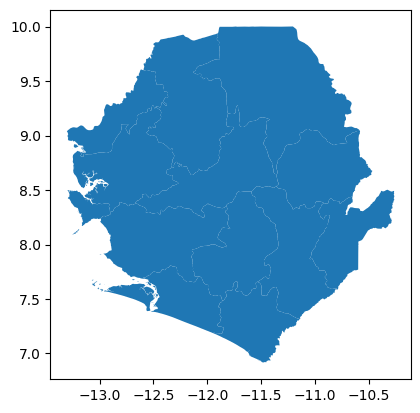

In [16]:
# Do a quick plot
gdf.plot()